In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('ecommerce_product_dataset.csv')

In [5]:
df.head()

,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,City
0,1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-10,Albuquerque
1,2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-28,Queens
2,3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-20,Austin
3,4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,2023-12-05,Dallas
4,5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,2023-08-10,Tucson


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ProductID      1000 non-null   int64  
 1   ProductName    1000 non-null   object 
 2   Category       1000 non-null   object 
 3   Price          1000 non-null   float64
 4   Rating         1000 non-null   float64
 5   NumReviews     1000 non-null   int64  
 6   StockQuantity  1000 non-null   int64  
 7   Discount       1000 non-null   float64
 8   Sales          1000 non-null   int64  
 9   DateAdded      1000 non-null   object 
 10  City           1000 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 86.1+ KB


In [7]:
df.describe(include='all')

,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded,City
count,1000.000000,1000,1000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000
unique,NaN,100,25,NaN,NaN,NaN,NaN,NaN,NaN,346,101
top,NaN,Biography,Electronics,NaN,NaN,NaN,NaN,NaN,NaN,2023-11-11,New York
freq,NaN,22,40,NaN,NaN,NaN,NaN,NaN,NaN,7,17
mean,500.500000,NaN,NaN,253.77551,3.025600,2498.753000,495.395000,0.251640,1011.037000,NaN,NaN
std,288.819436,NaN,NaN,141.40362,1.151004,1463.241871,292.799253,0.146455,582.113466,NaN,NaN
min,1.000000,NaN,NaN,10.11000,1.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,250.750000,NaN,NaN,133.09250,2.100000,1201.750000,241.750000,0.130000,502.000000,NaN,NaN
50%,500.500000,NaN,NaN,251.31000,3.100000,2476.000000,505.000000,0.250000,998.000000,NaN,NaN
75%,750.250000,NaN,NaN,375.82750,4.000000,3797.500000,743.500000,0.380000,1540.000000,NaN,NaN


# Data Cleaning

In [8]:
# Fill numerical columns with median
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [9]:
# Fill categorical columns with mode
cat_cols = df.select_dtypes(include=[object]).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

In [11]:
print("\nMissing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
ProductID        0
ProductName      0
Category         0
Price            0
Rating           0
NumReviews       0
StockQuantity    0
Discount         0
Sales            0
DateAdded        0
City             0
dtype: int64


In [16]:
# Convert 'DateAdded' to datetime if it is not
df['DateAdded'] = pd.to_datetime(df['DateAdded'], errors='coerce')

In [15]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [17]:
print("\nData types after conversion:")
print(df.dtypes)


Data types after conversion:
ProductID                 int64
ProductName              object
Category                 object
Price                   float64
Rating                  float64
NumReviews                int64
StockQuantity             int64
Discount                float64
Sales                     int64
DateAdded        datetime64[ns]
City                     object
dtype: object


# Data Visualization

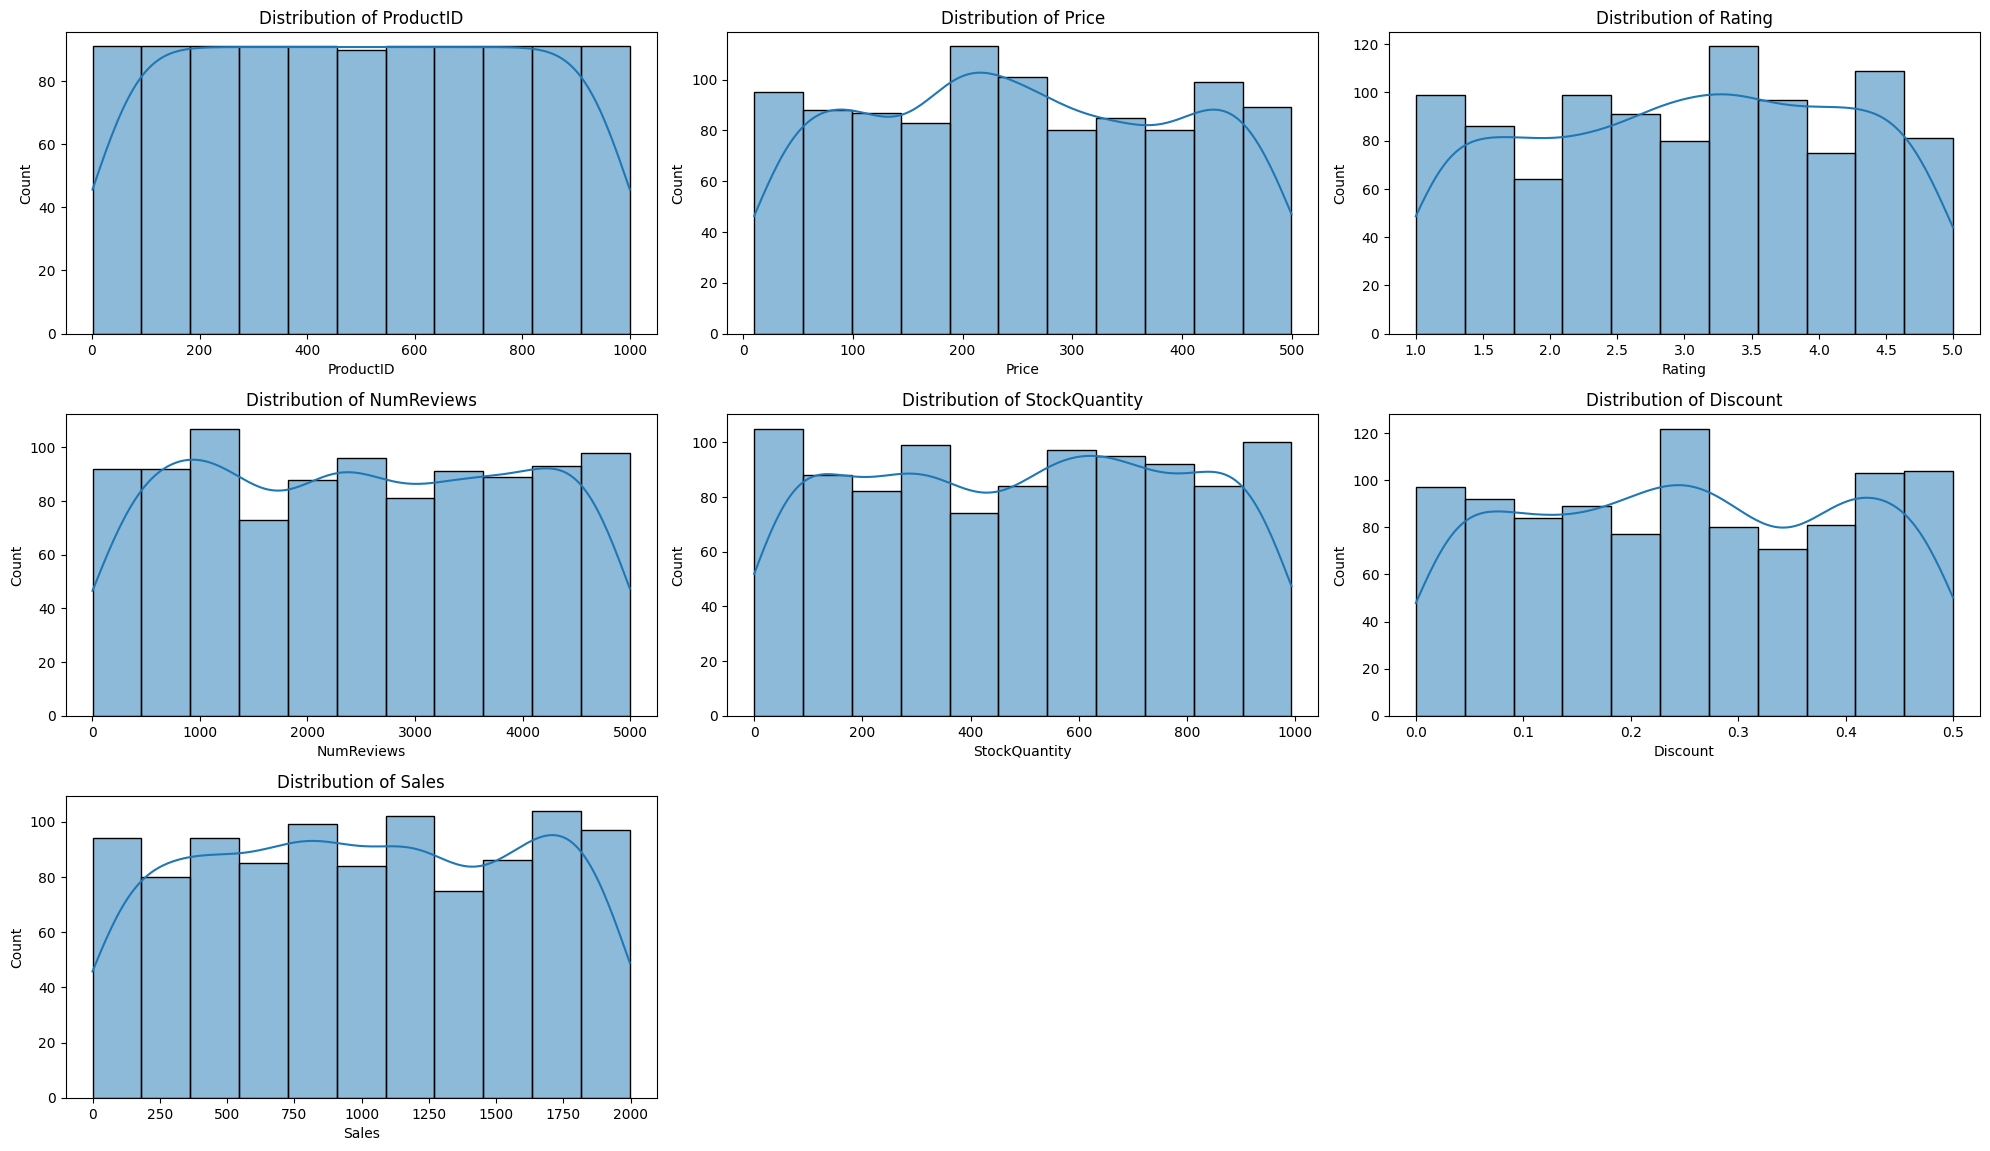

In [20]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(num_cols):
    plt.subplot(4, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

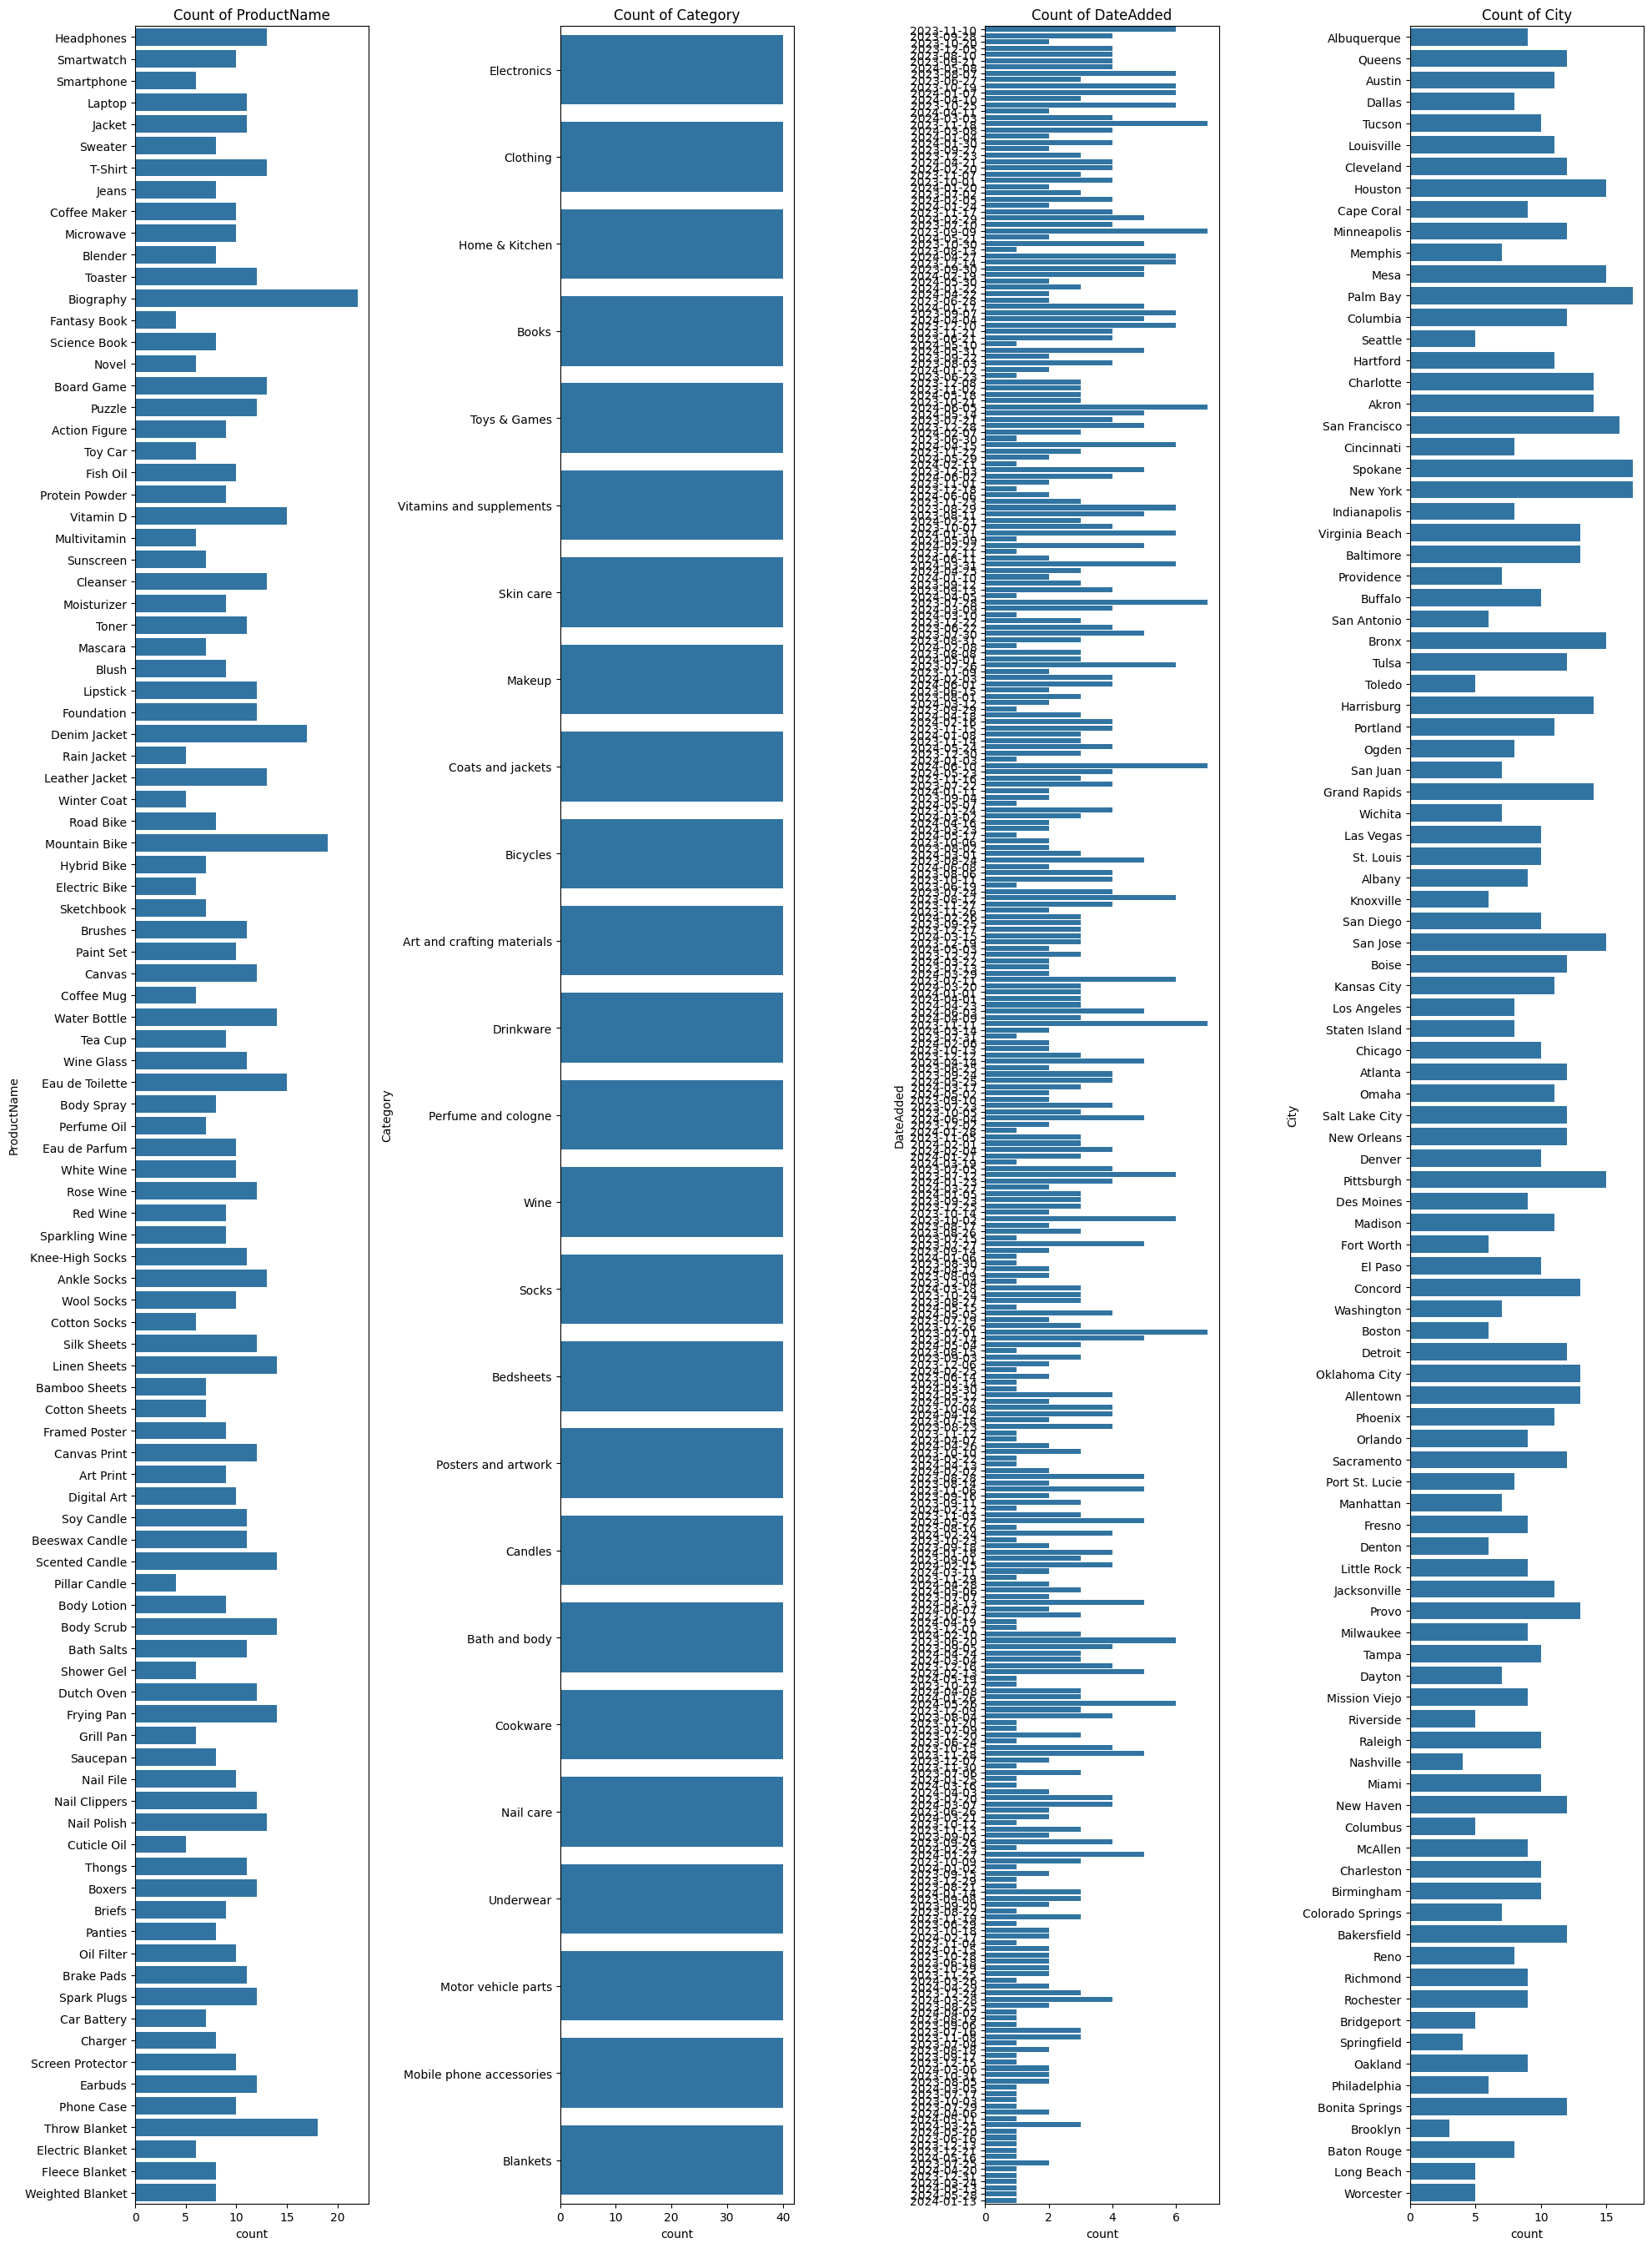

In [26]:
plt.figure(figsize=(20, 80))
for i, col in enumerate(cat_cols):
    plt.subplot(3, 4, i+1)
    sns.countplot(y=df[col])
    plt.title(f'Count of {col}')
plt.tight_layout()
plt.show()

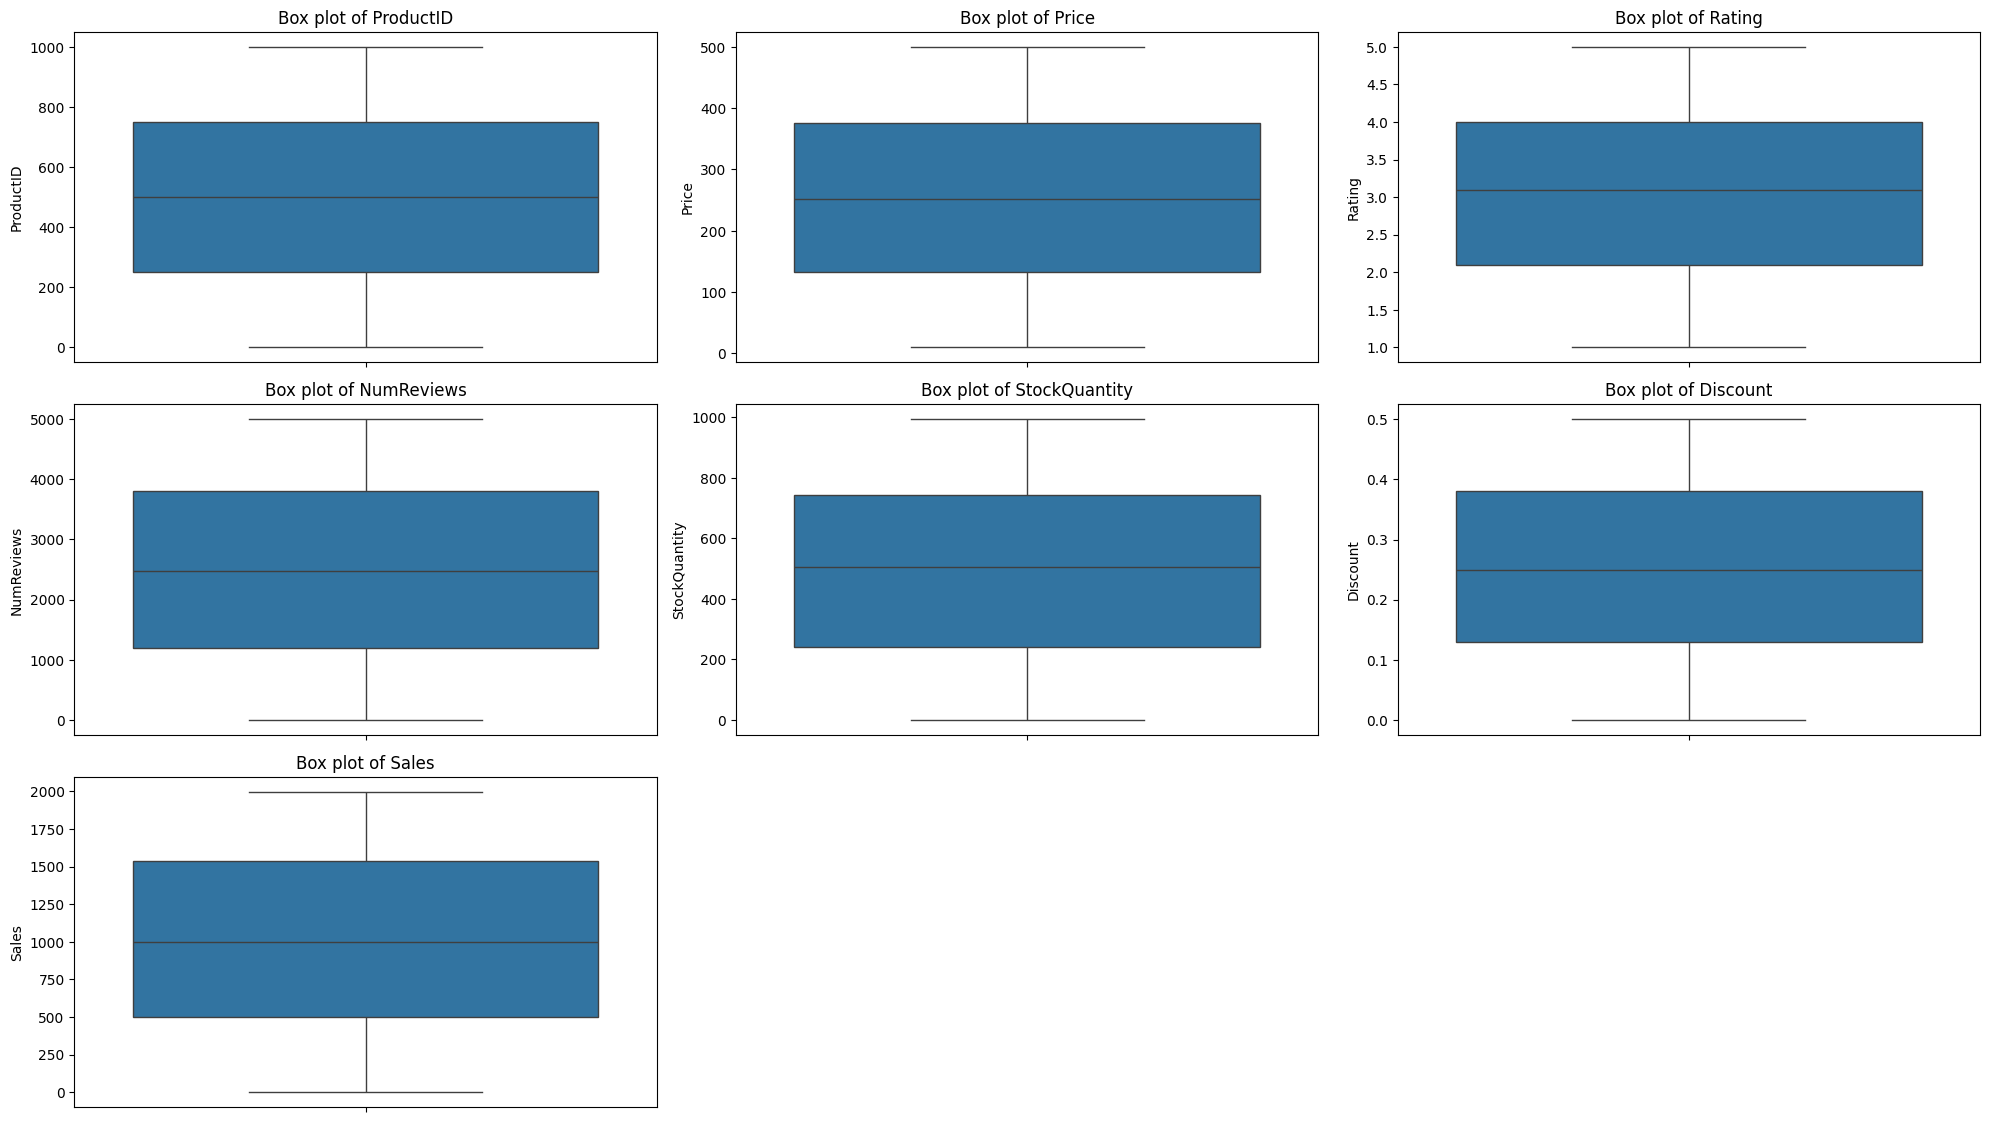

In [27]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(num_cols):
    plt.subplot(4, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

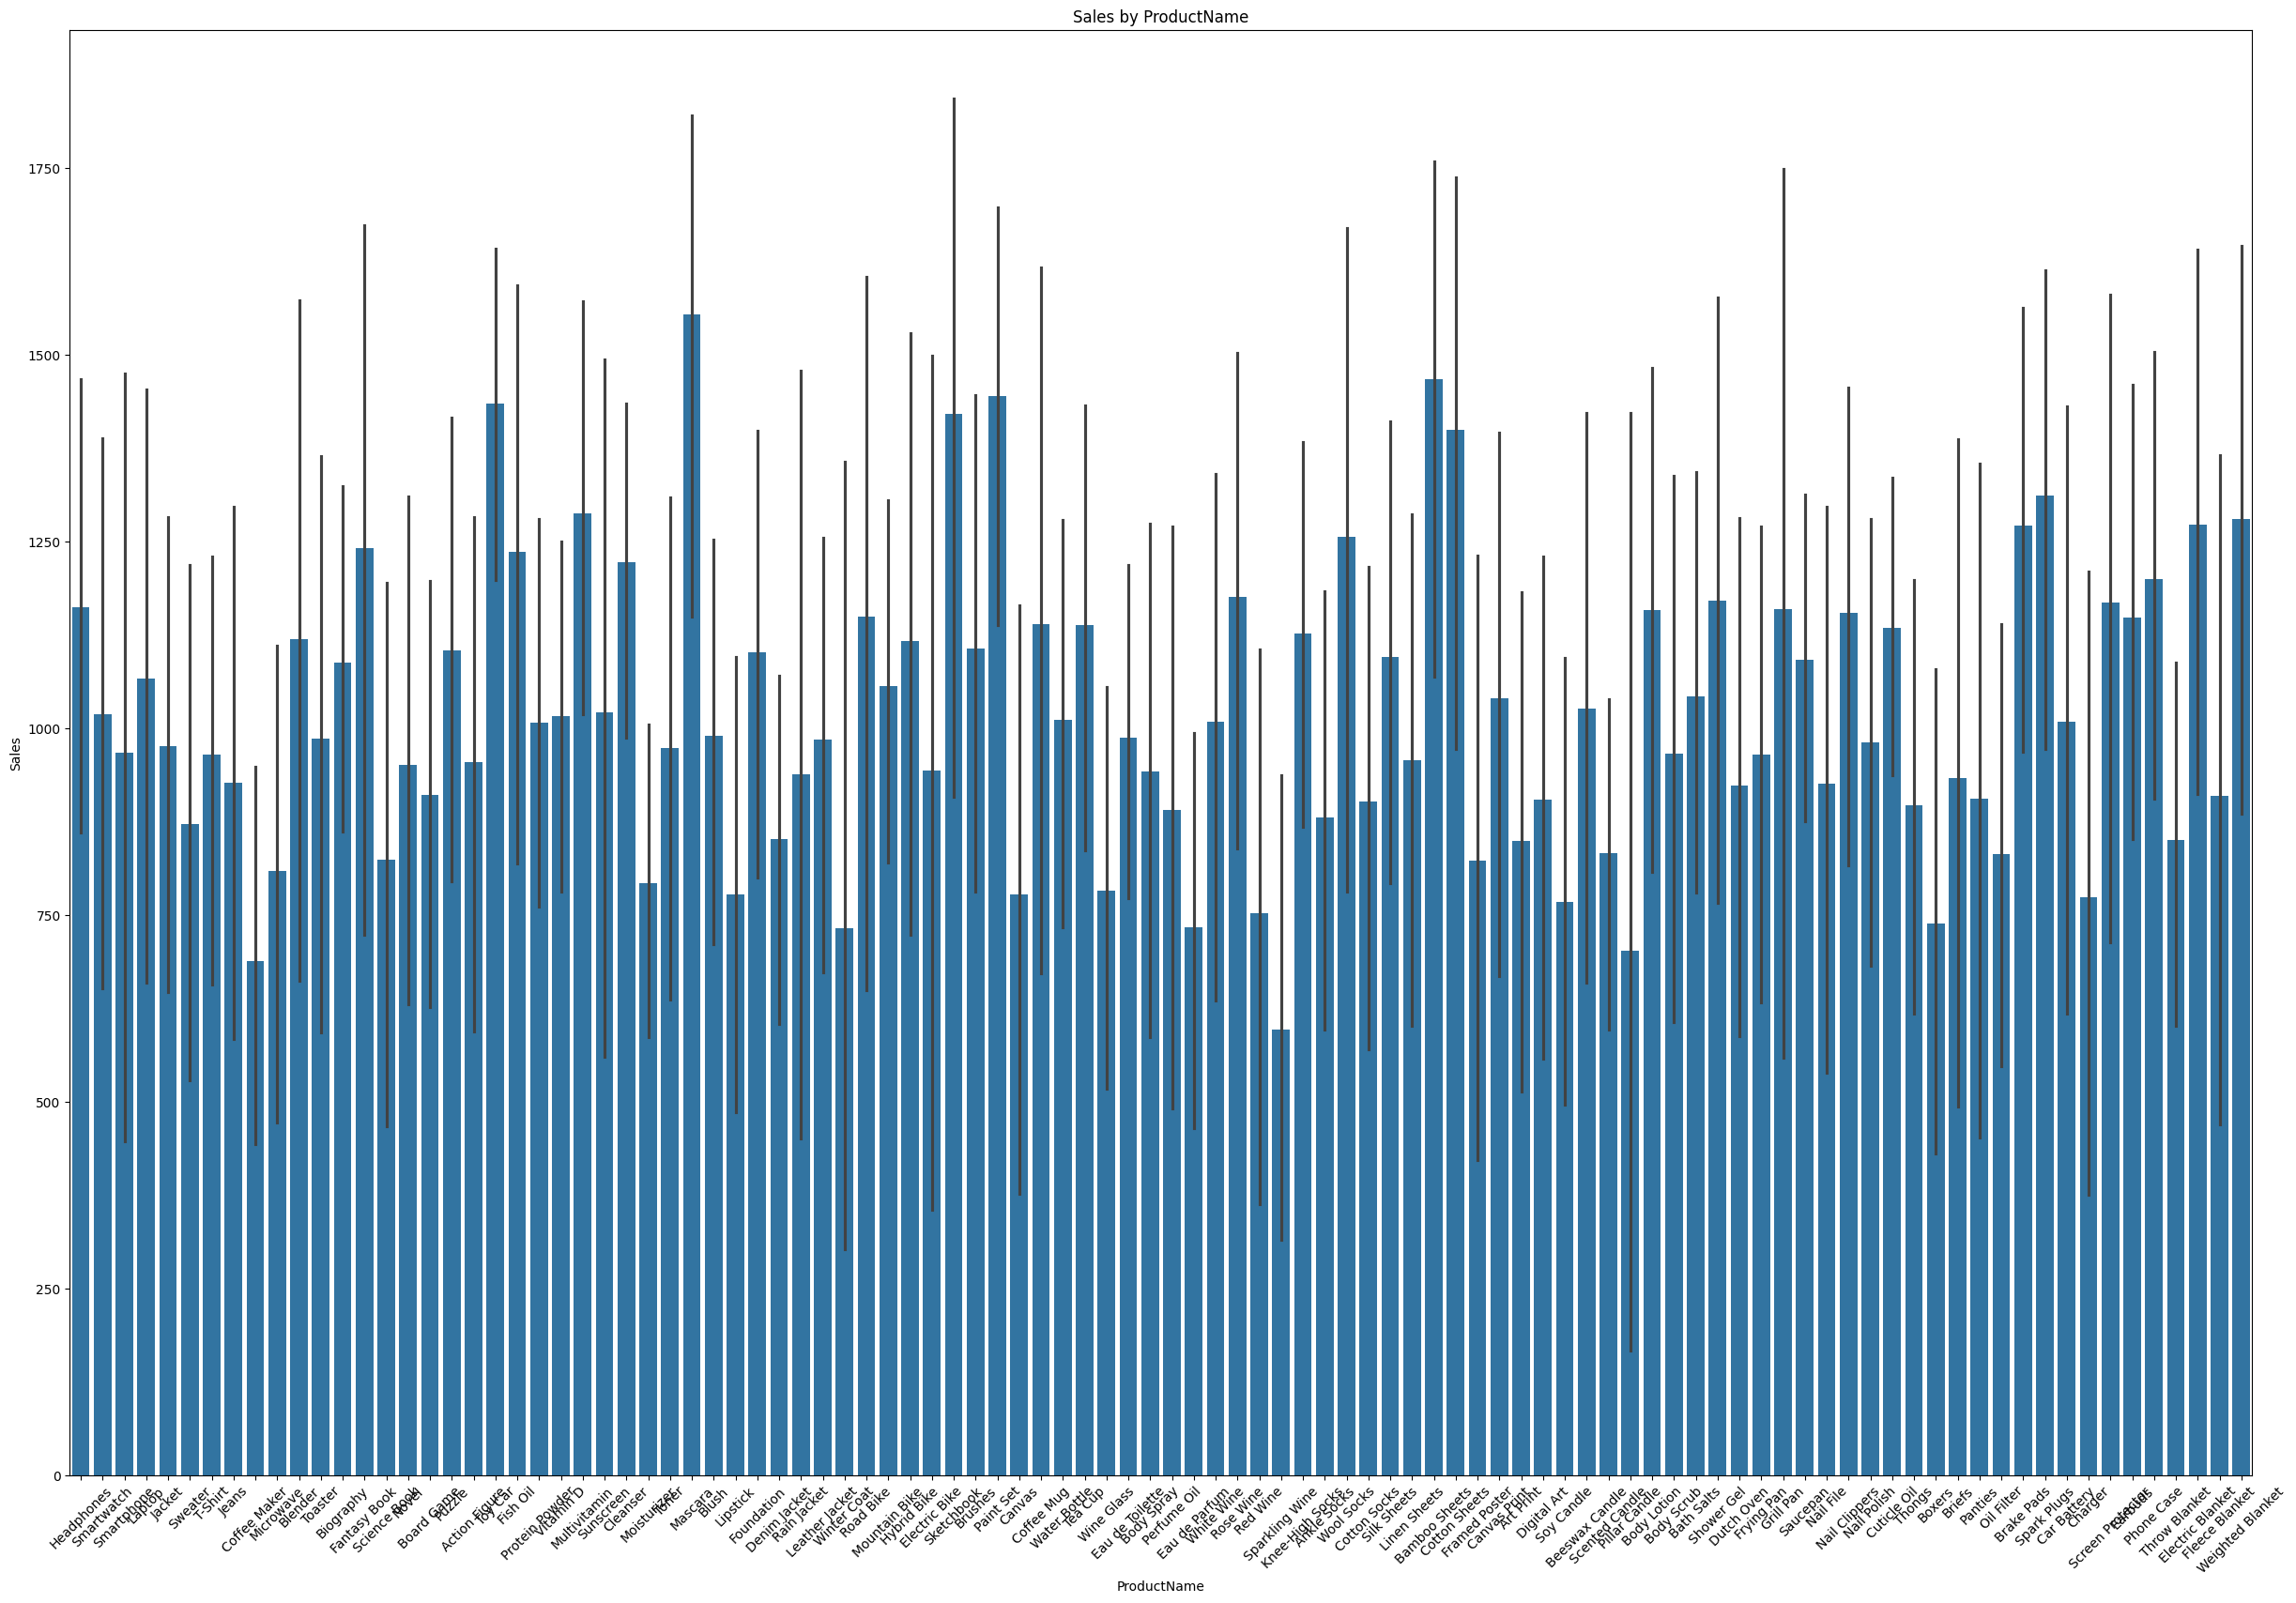

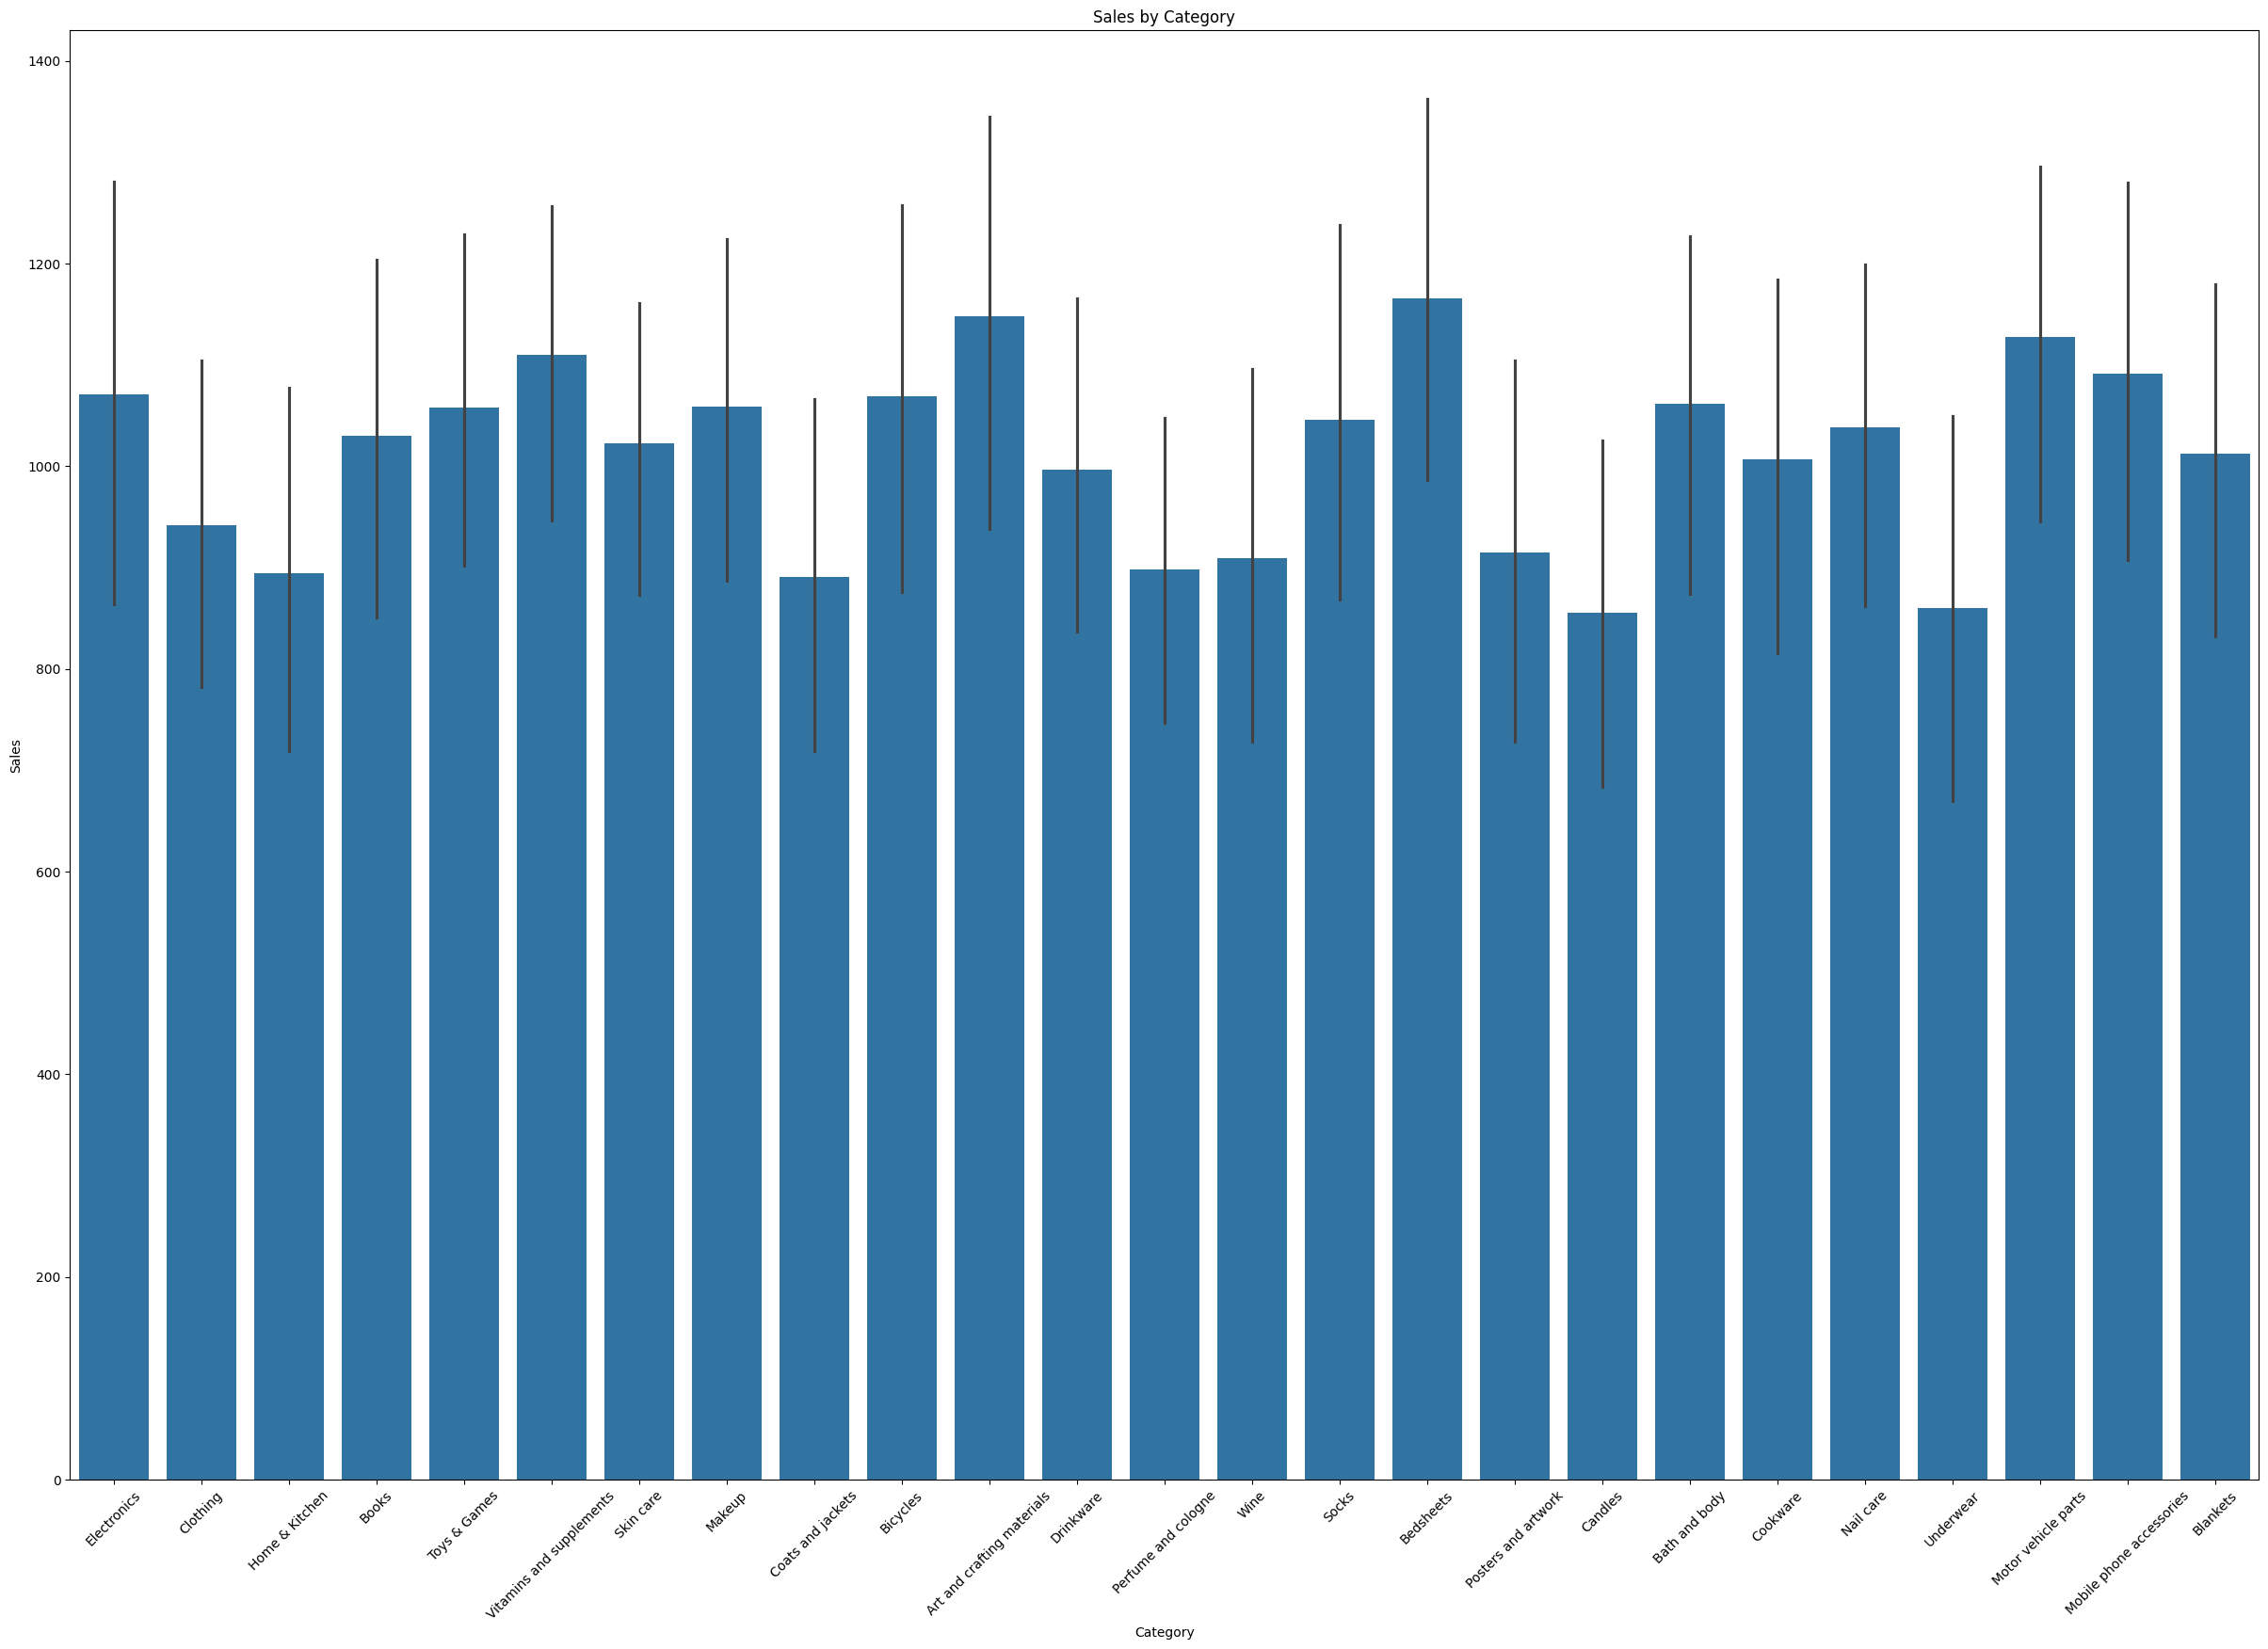

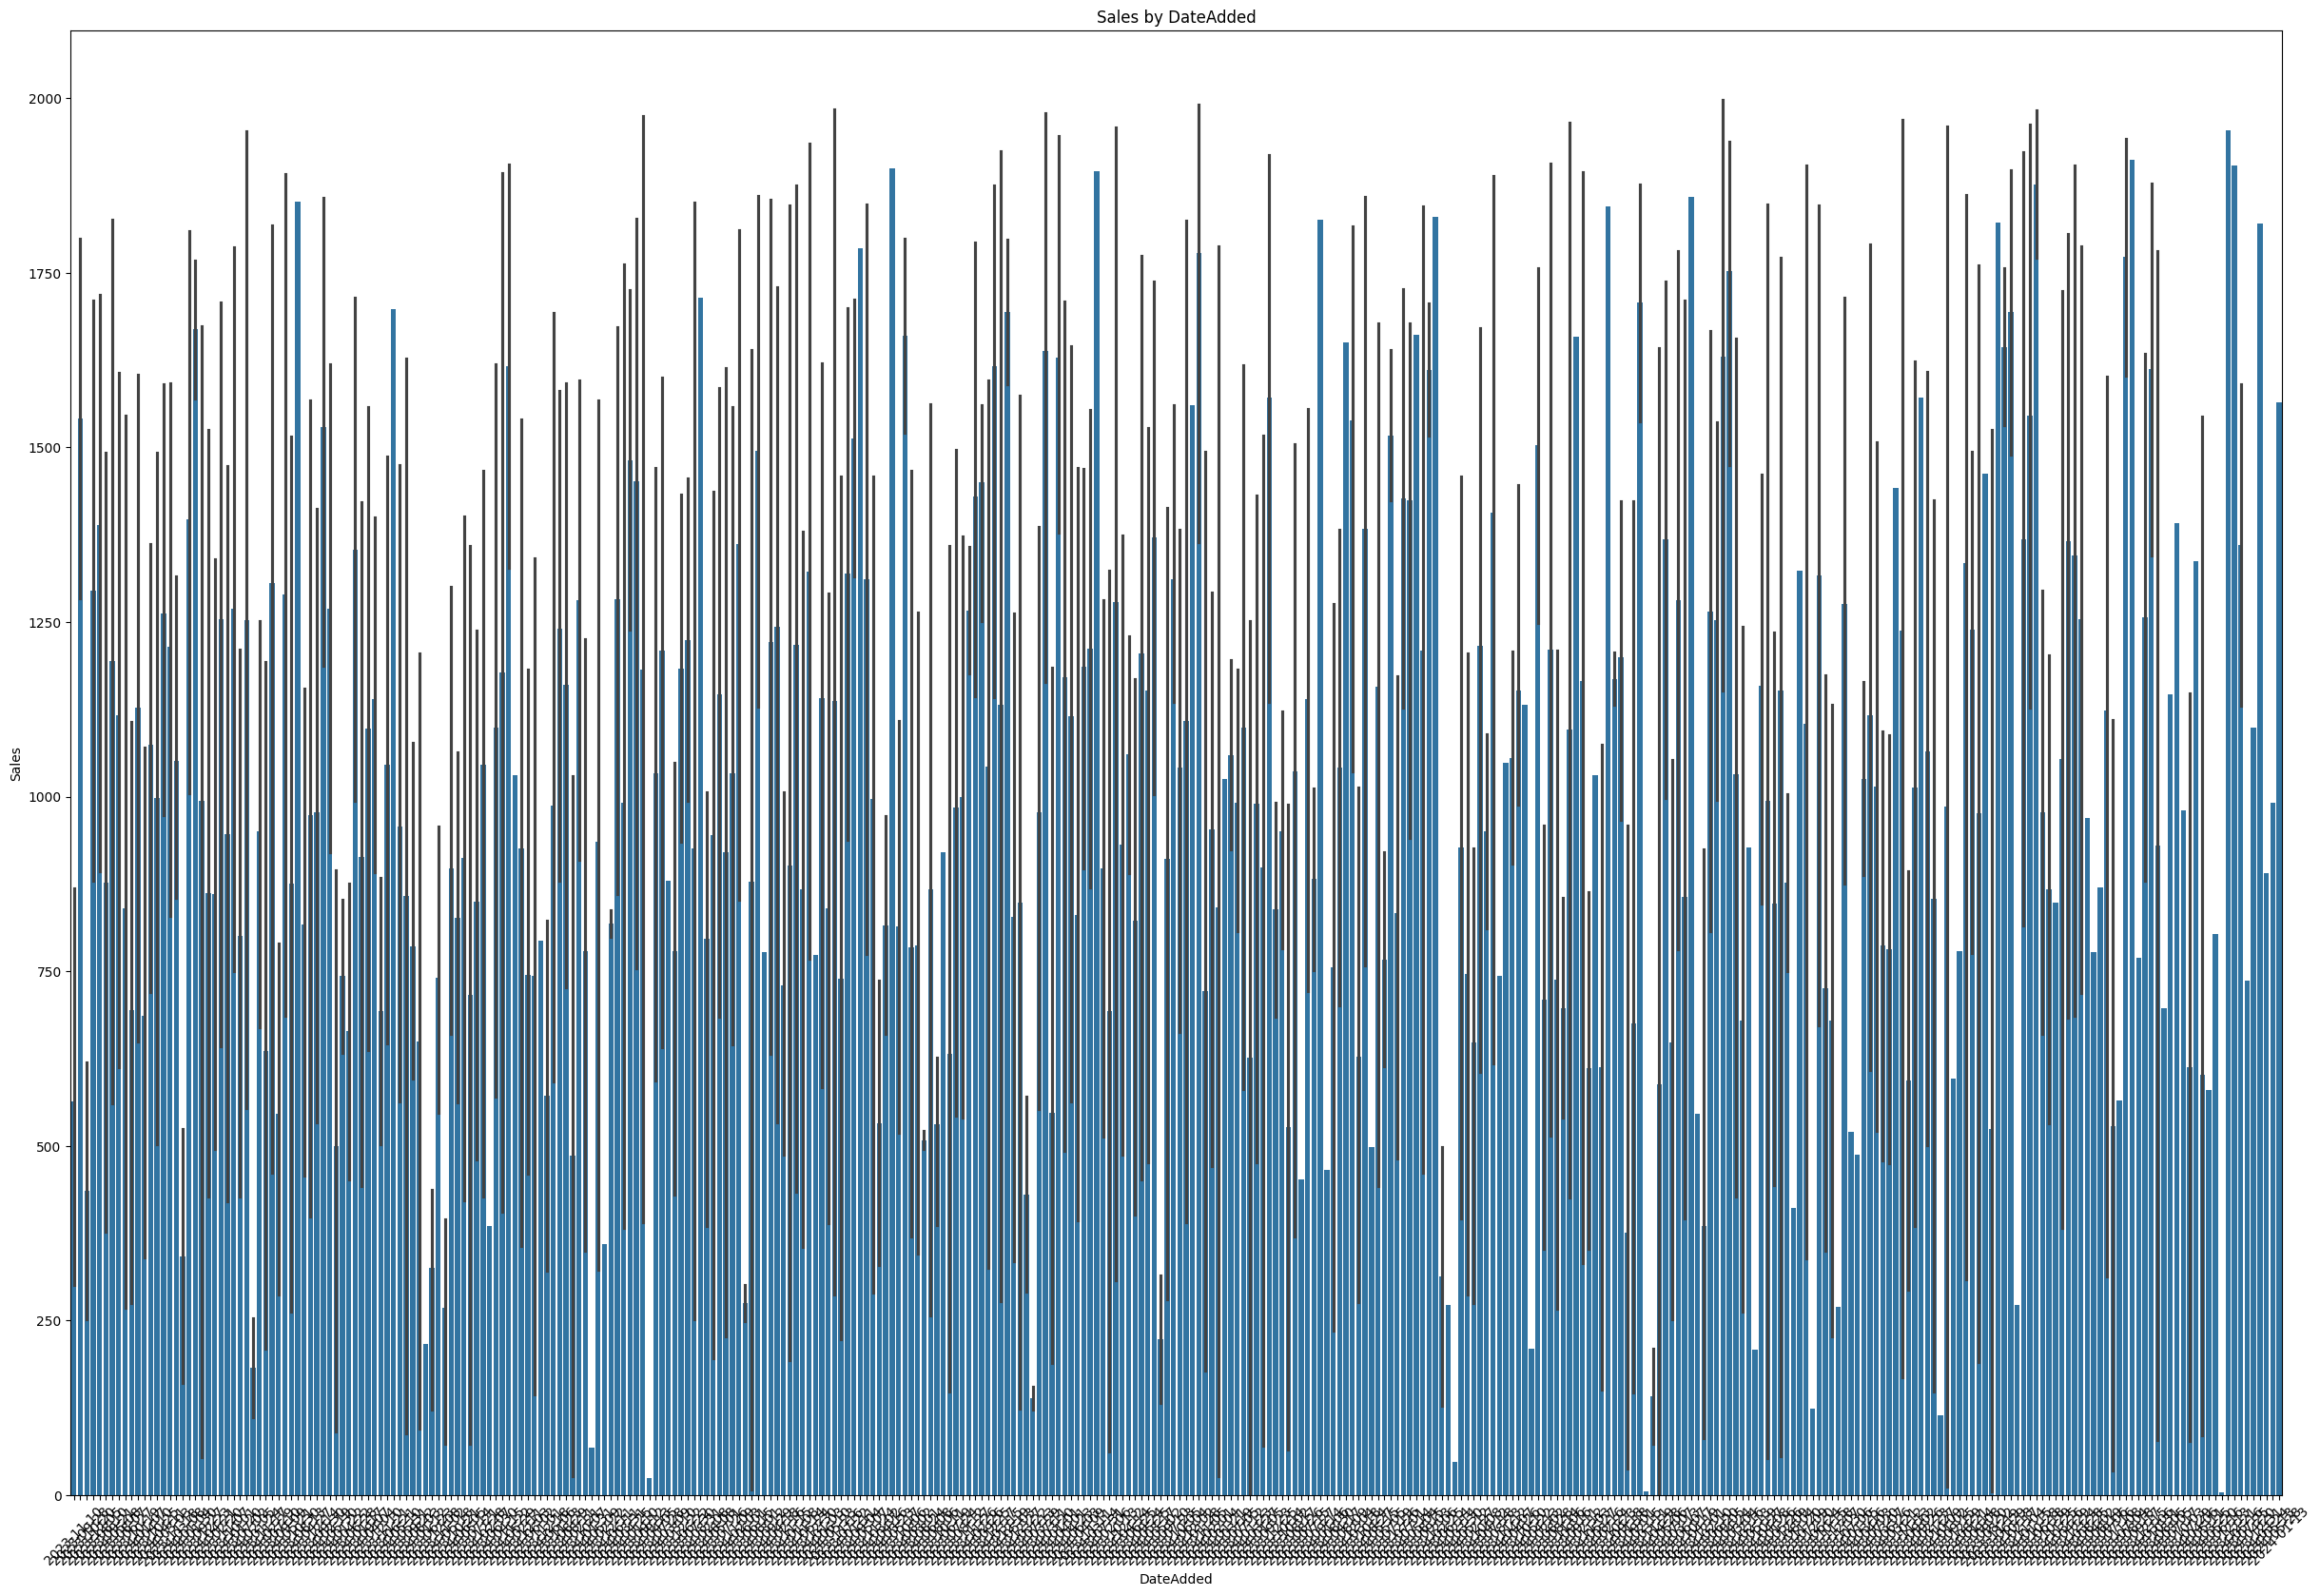

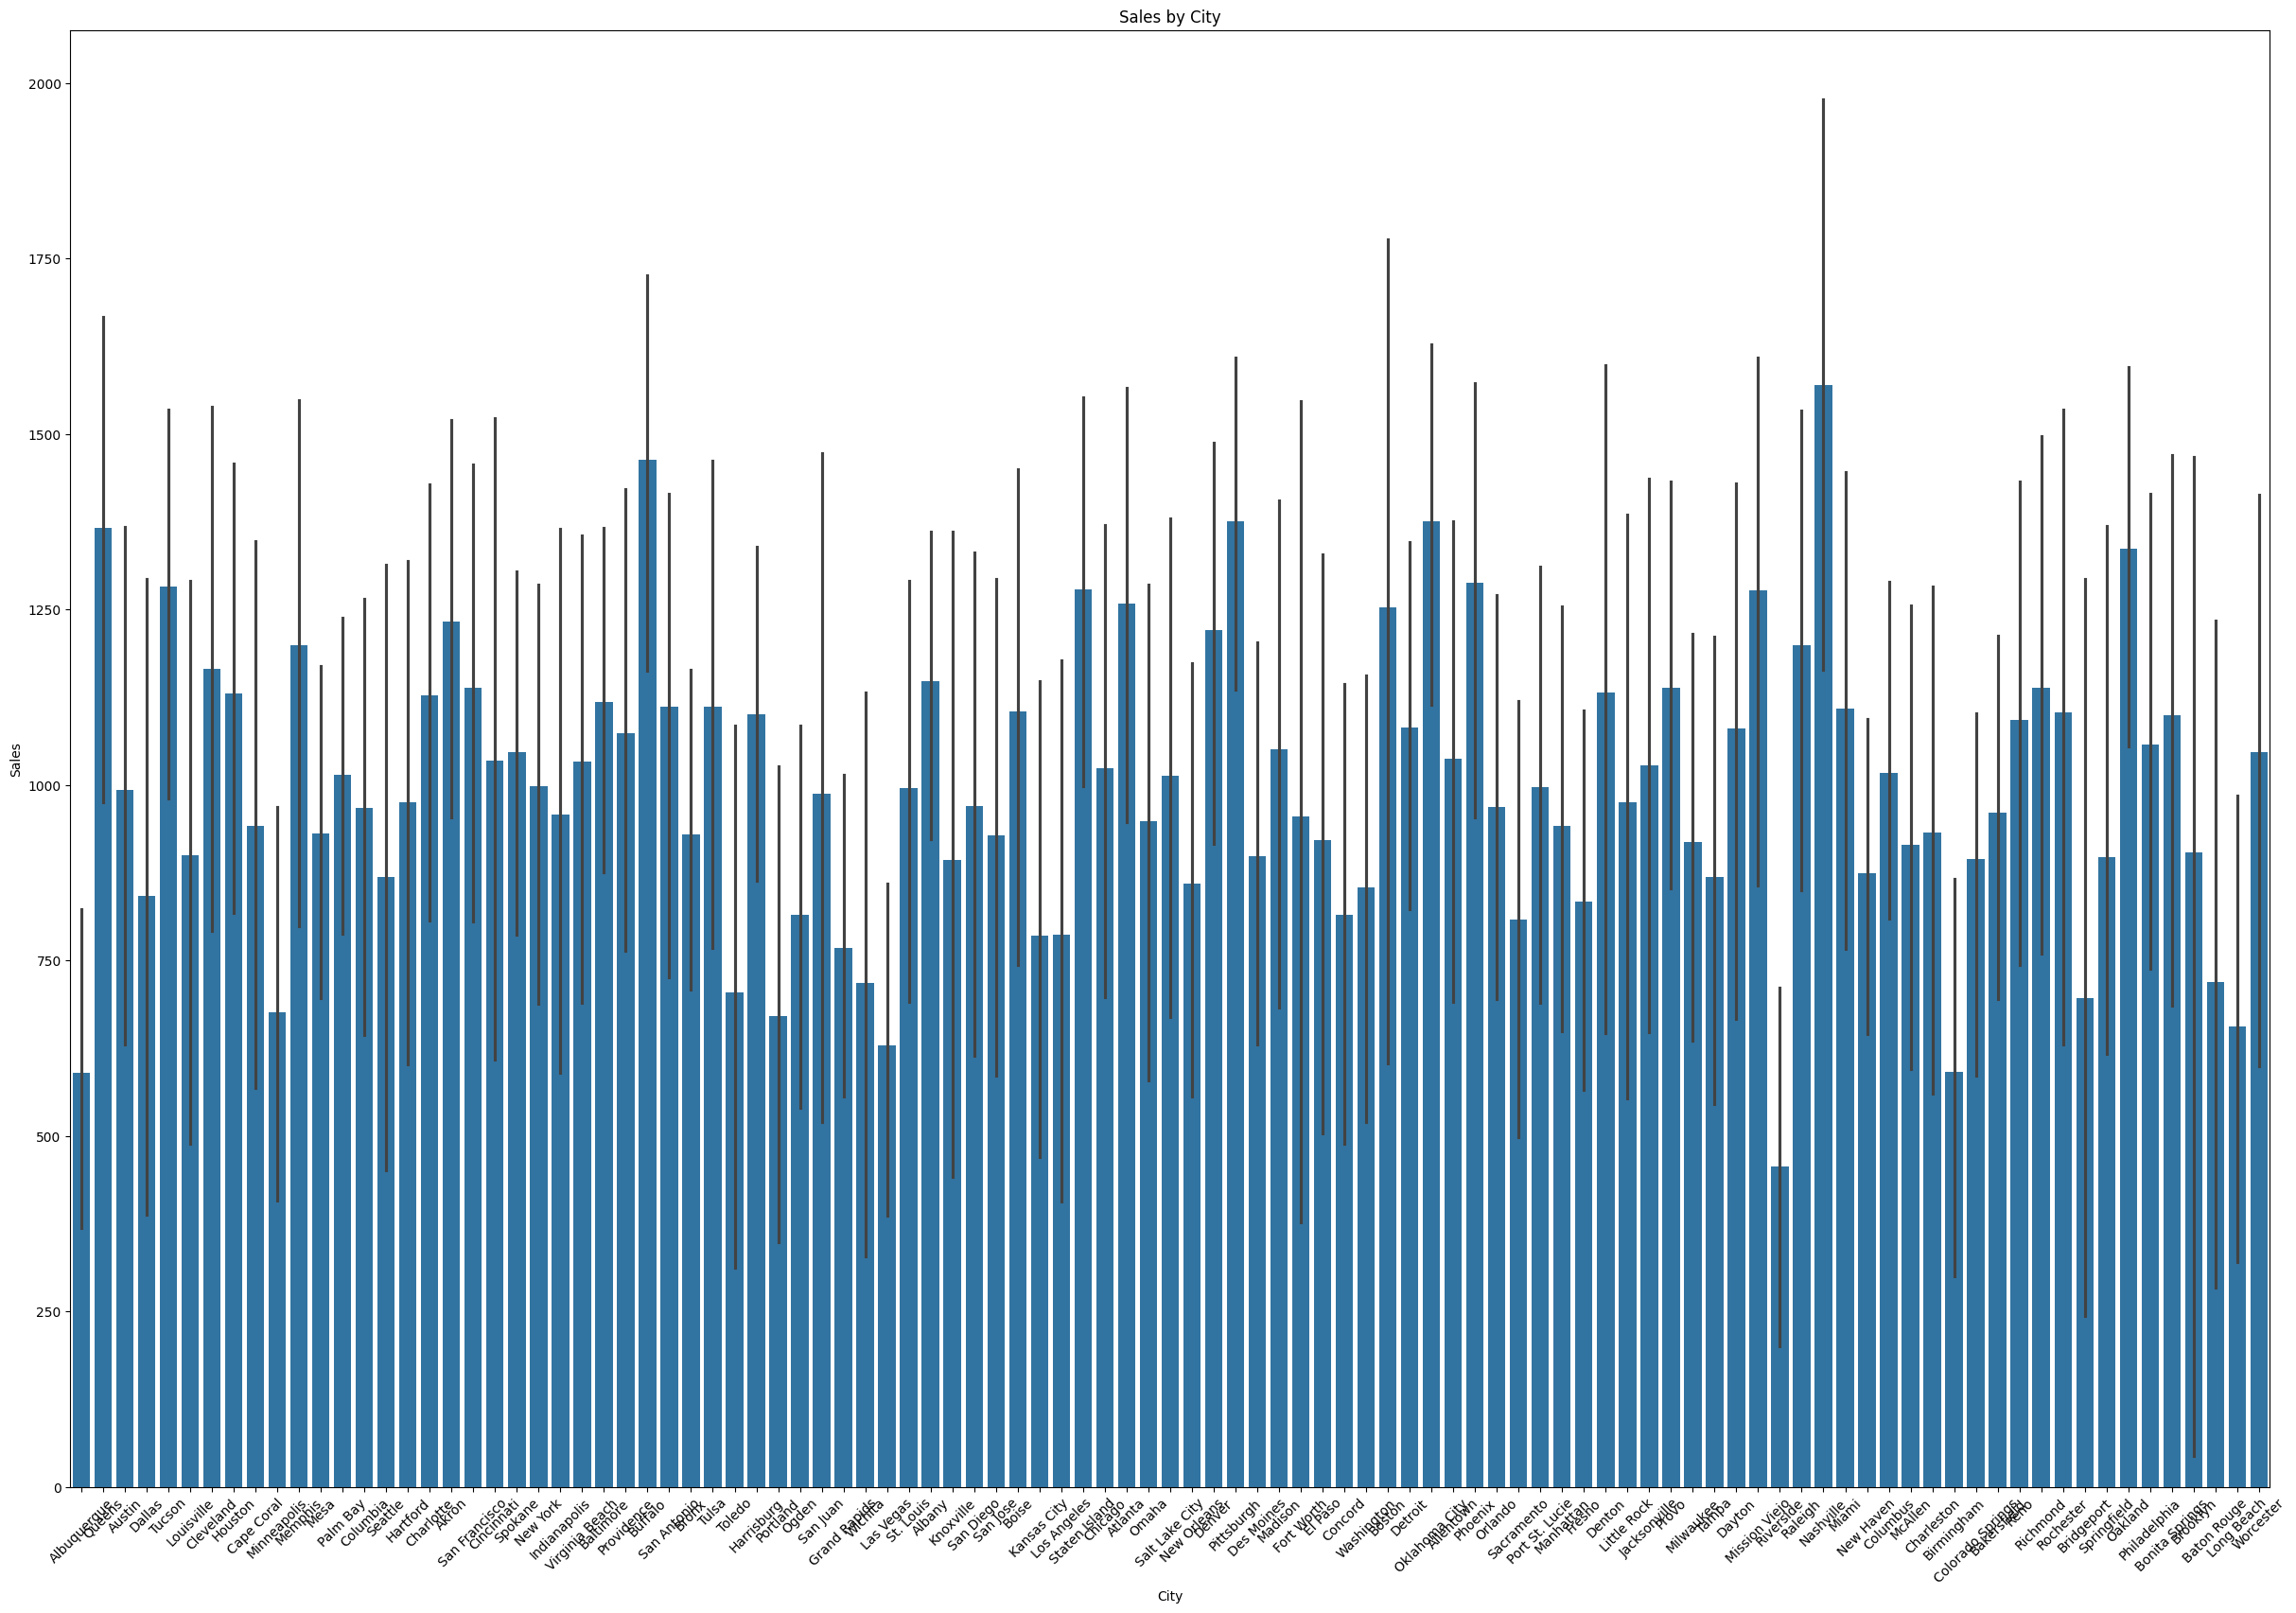

In [41]:
for col in cat_cols:
    plt.figure(figsize=(30, 20))
    sns.barplot(x=col, y='Sales', data=df)
    plt.title(f'Sales by {col}')
    plt.xticks(rotation=45)
    plt.show()

# Outlier Detection and Removal

In [28]:
from scipy.stats import zscore

In [29]:
from scipy.stats import zscore
z_scores = np.abs(zscore(df[num_cols]))

In [31]:
threshold = 3
outliers = (z_scores > threshold).any(axis=1)
cleaned_data = df[~outliers]

In [42]:
print("\nOriginal data shape:", df.shape)
print("Cleaned data shape:", cleaned_data.shape)


Original data shape: (1000, 11)
Cleaned data shape: (1000, 11)


In [ ]:
cleaned_data.to_csv('cleaned_ecommerce_product_dataset.csv', index=False)
print("\nCleaned data saved to 'cleaned_ecommerce_product_dataset.csv'")